In [ ]:
!nvidia-smi


Sun Sep 22 11:55:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 21.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode  =checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 772, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'export', 'train', 'predict', 'benchmark', 'track', 'val'}.

    Arguments received: ['yolo', 'mode', '=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'detect', 'obb', 'pose', 'segment', 'classify'}
                MODE (required) is one of {'export', 'train', 'predict', 'benchmark', 'track', 'val'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS a

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8rXPVbRnolx15Yto5Emn")
project = rf.workspace("aabha").project("bap-obqut")
version = project.version(4)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.98, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to BAP-4 in yolov8:: 100%|██████████| 3374/3374 [00:03<00:00, 884.36it/s] 


In [ ]:
!yolo task=detect mode = train  model = yolov8m.pt data ={dataset.location}/data.yaml epochs=100 imgsz=640

Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/BAP-4/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

In [18]:
!yolo task=detect mode = val  model = /content/runs/detect/train7/weights/best.pt data ={dataset.location}/data.yaml

Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,854,814 parameters, 0 gradients, 78.8 GFLOPs
val: Scanning /content/BAP-4/valid/labels.cache... 333 images, 0 backgrounds, 0 corrupt: 100% 333/333 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:11<00:00,  1.79it/s]
                   all        333       3004      0.674      0.451      0.456      0.257
             Ambulance          1          1          1          0          0          0
             Barricade          1          1          0          0          0          0
                  Bike        195        547      0.814      0.559      0.571      0.322
                 Board         33         57      0.498      0.193      0.178      0.124
              Building         12         15      0.319        0.2      0.166     0.0622
          Bullock-cart          3          3      0

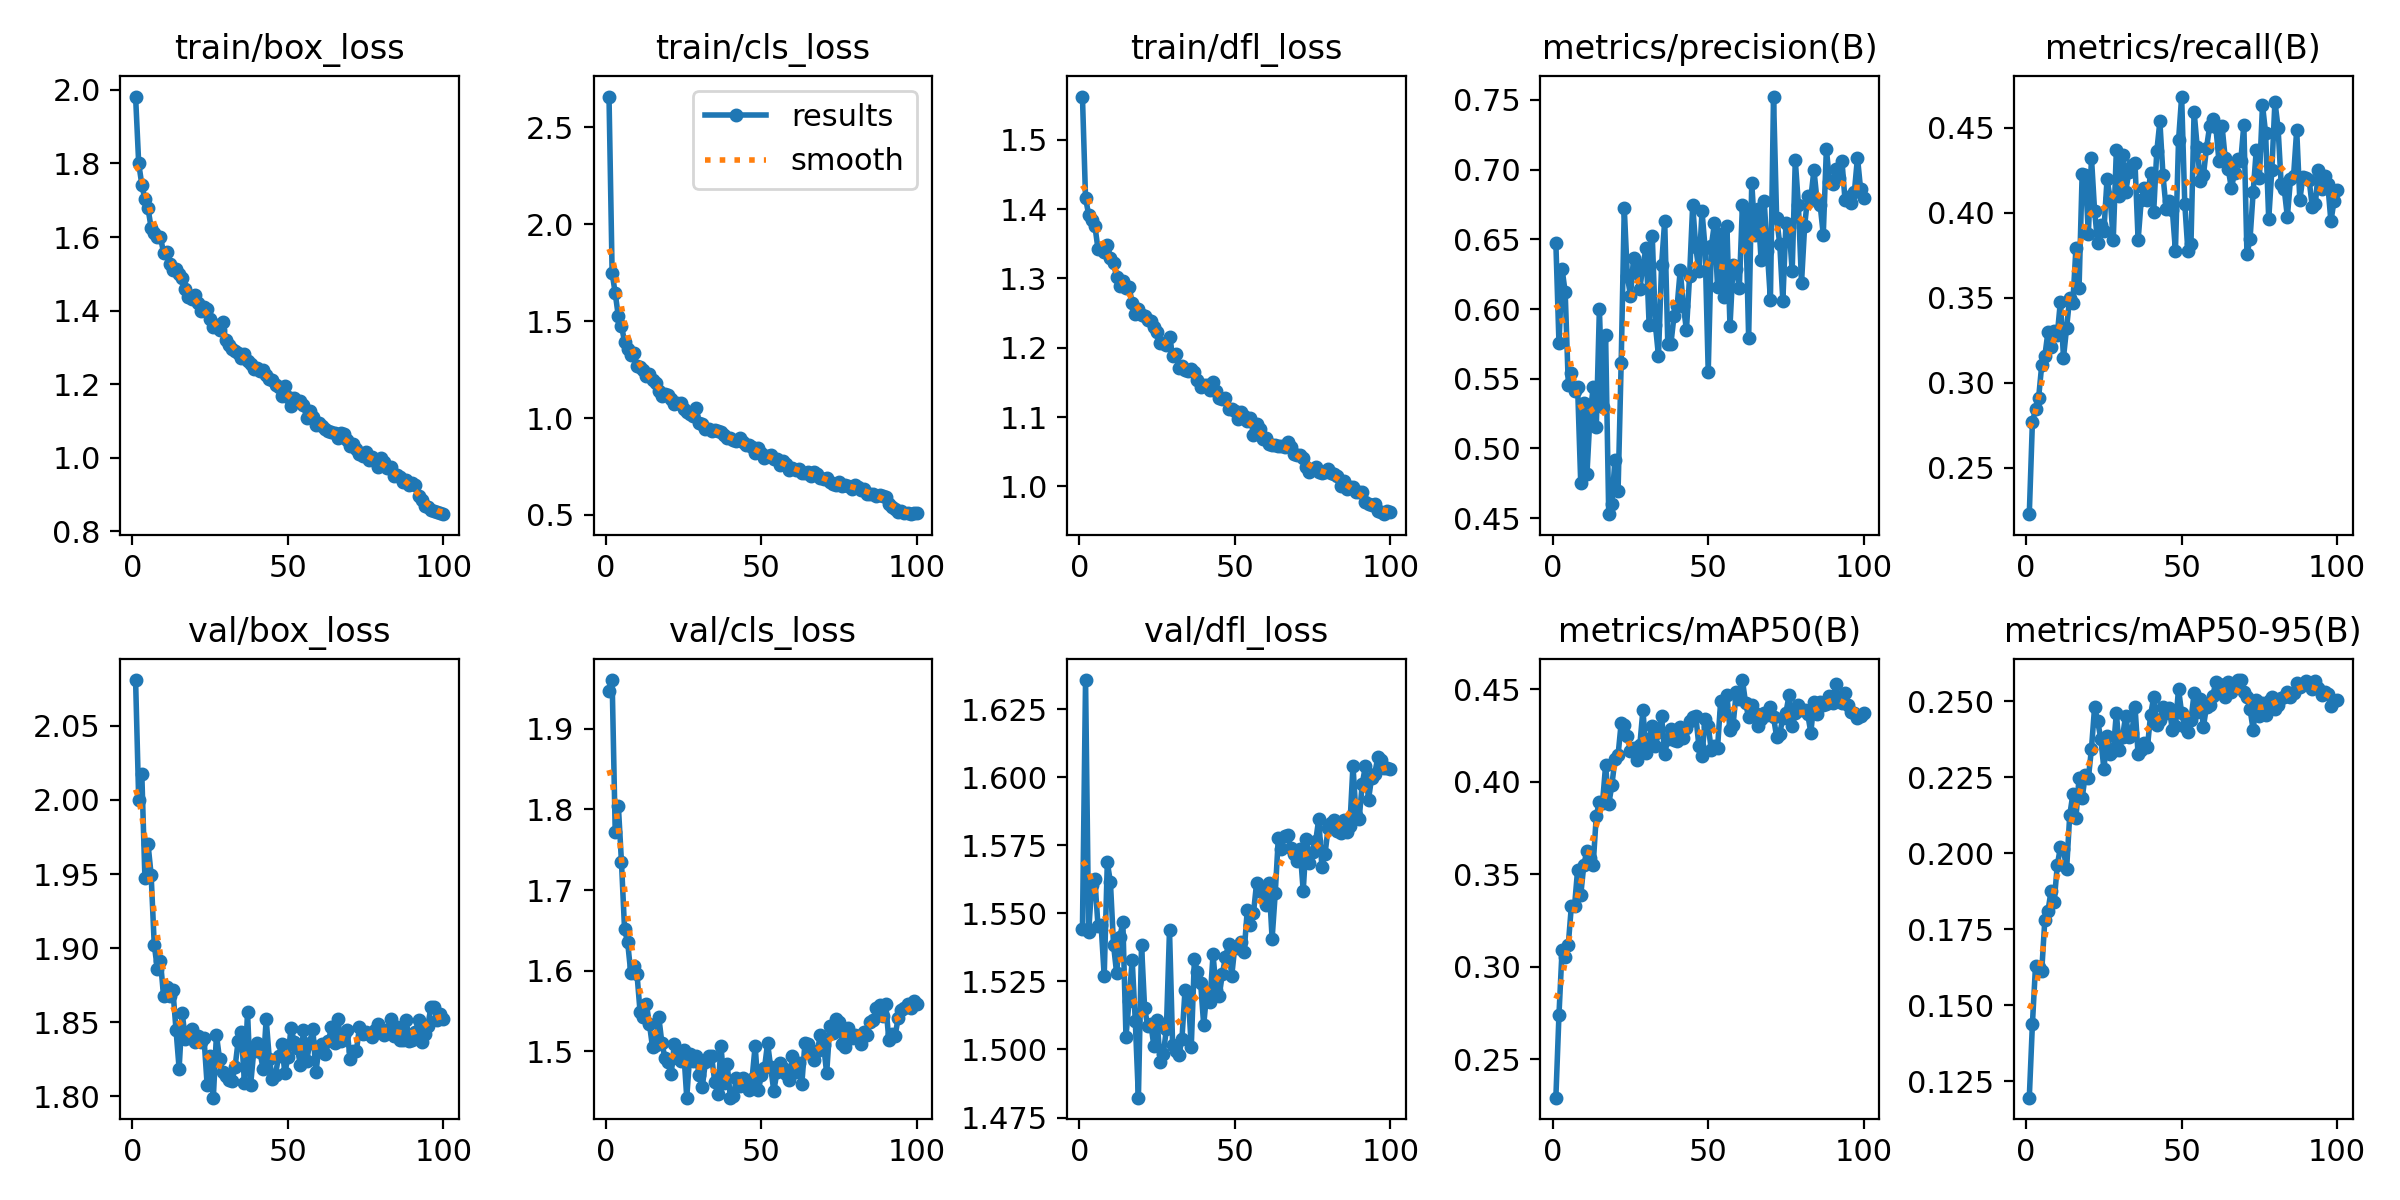

In [20]:
Image(filename =f"/content/runs/detect/train7/results.png" , width = 600 )

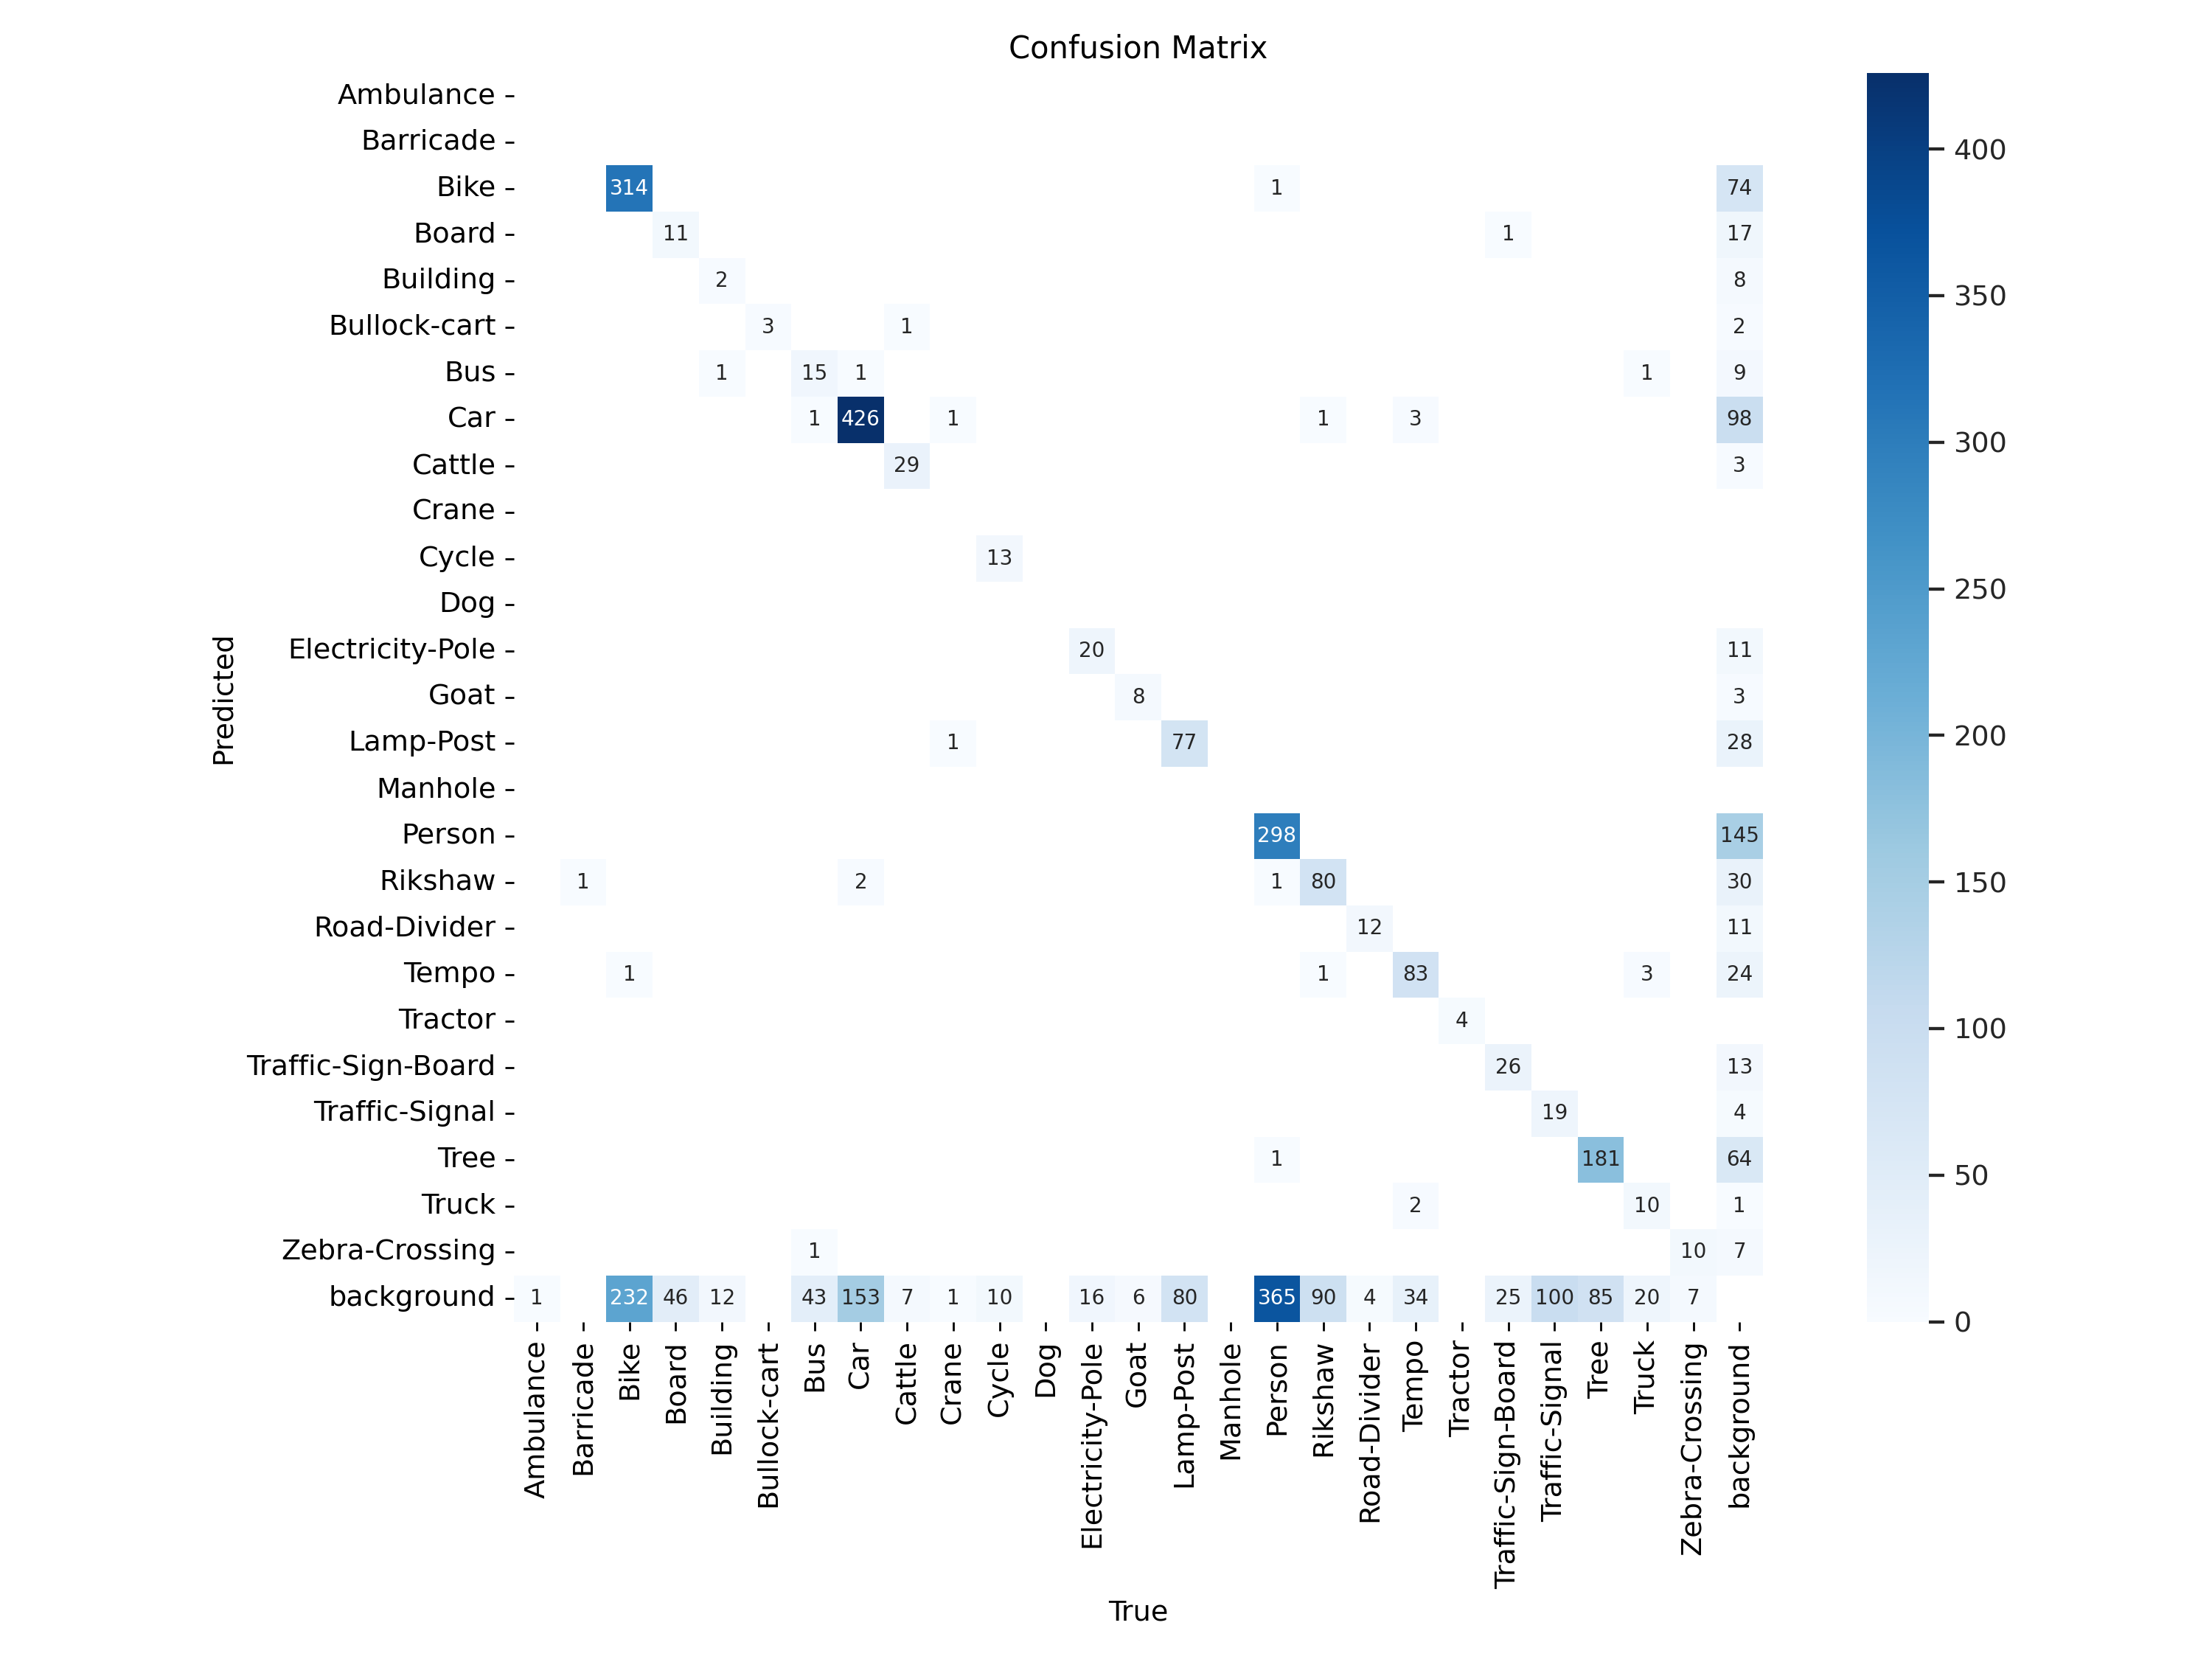

In [22]:
Image(filename =f"/content/runs/detect/val/confusion_matrix.png" , width = 600 )

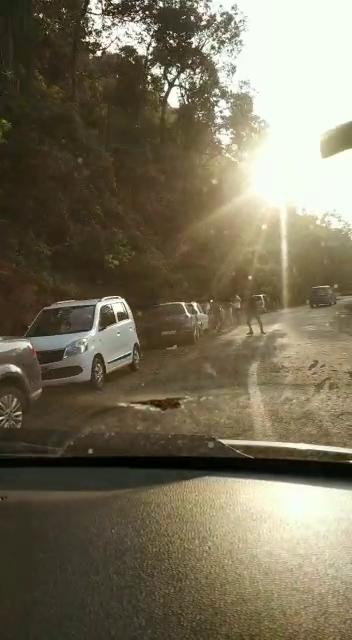

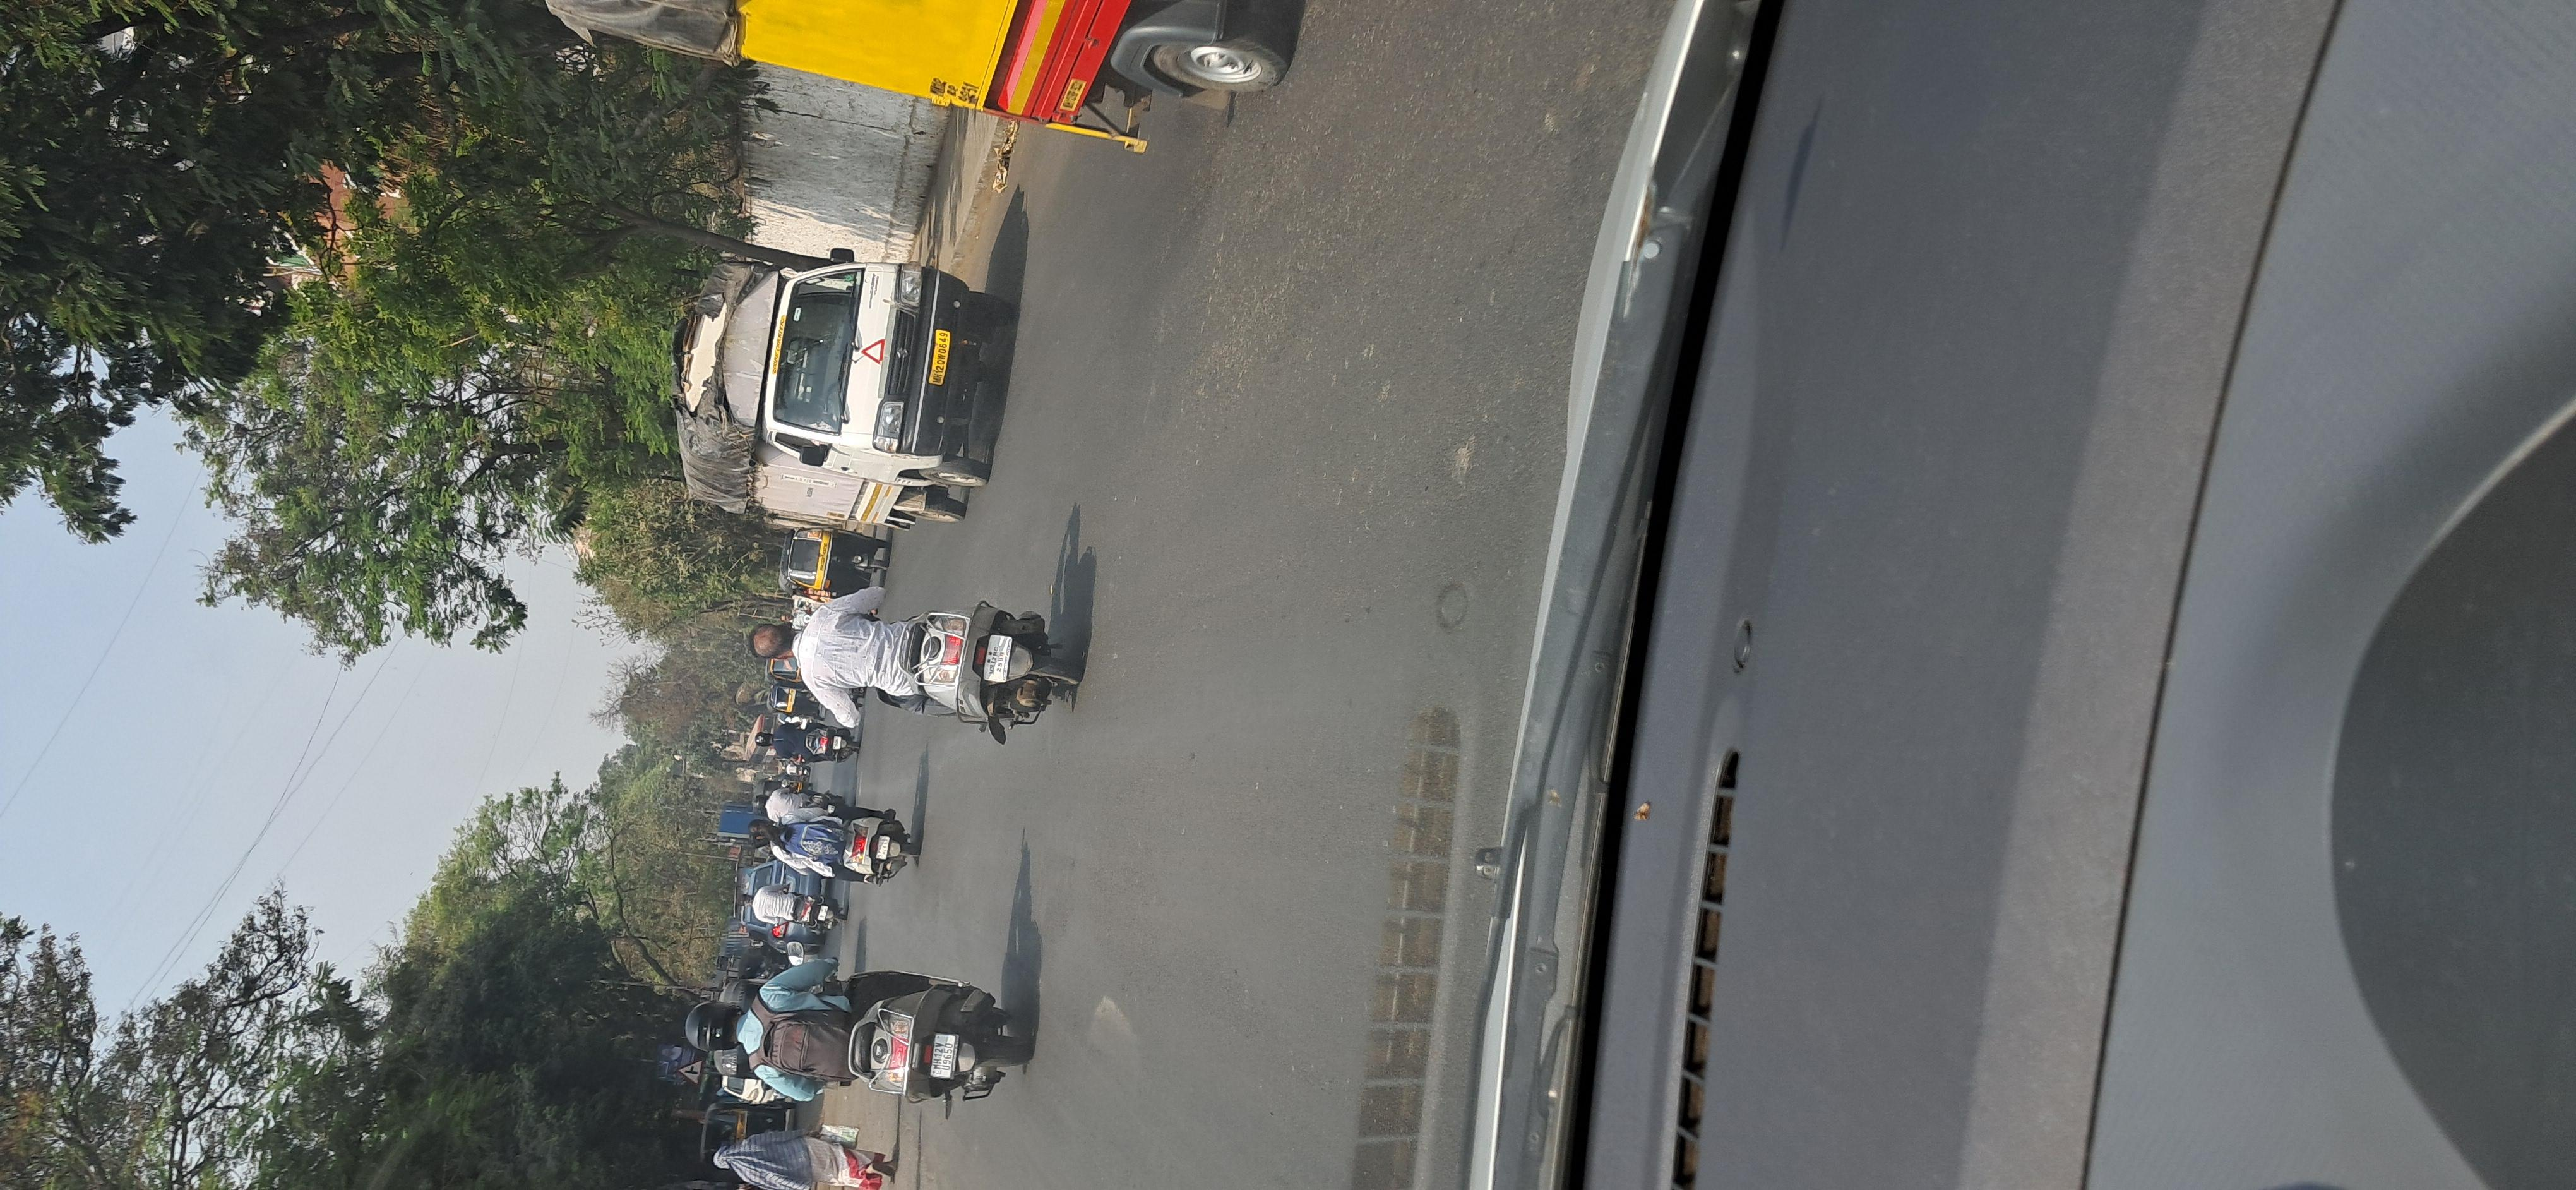

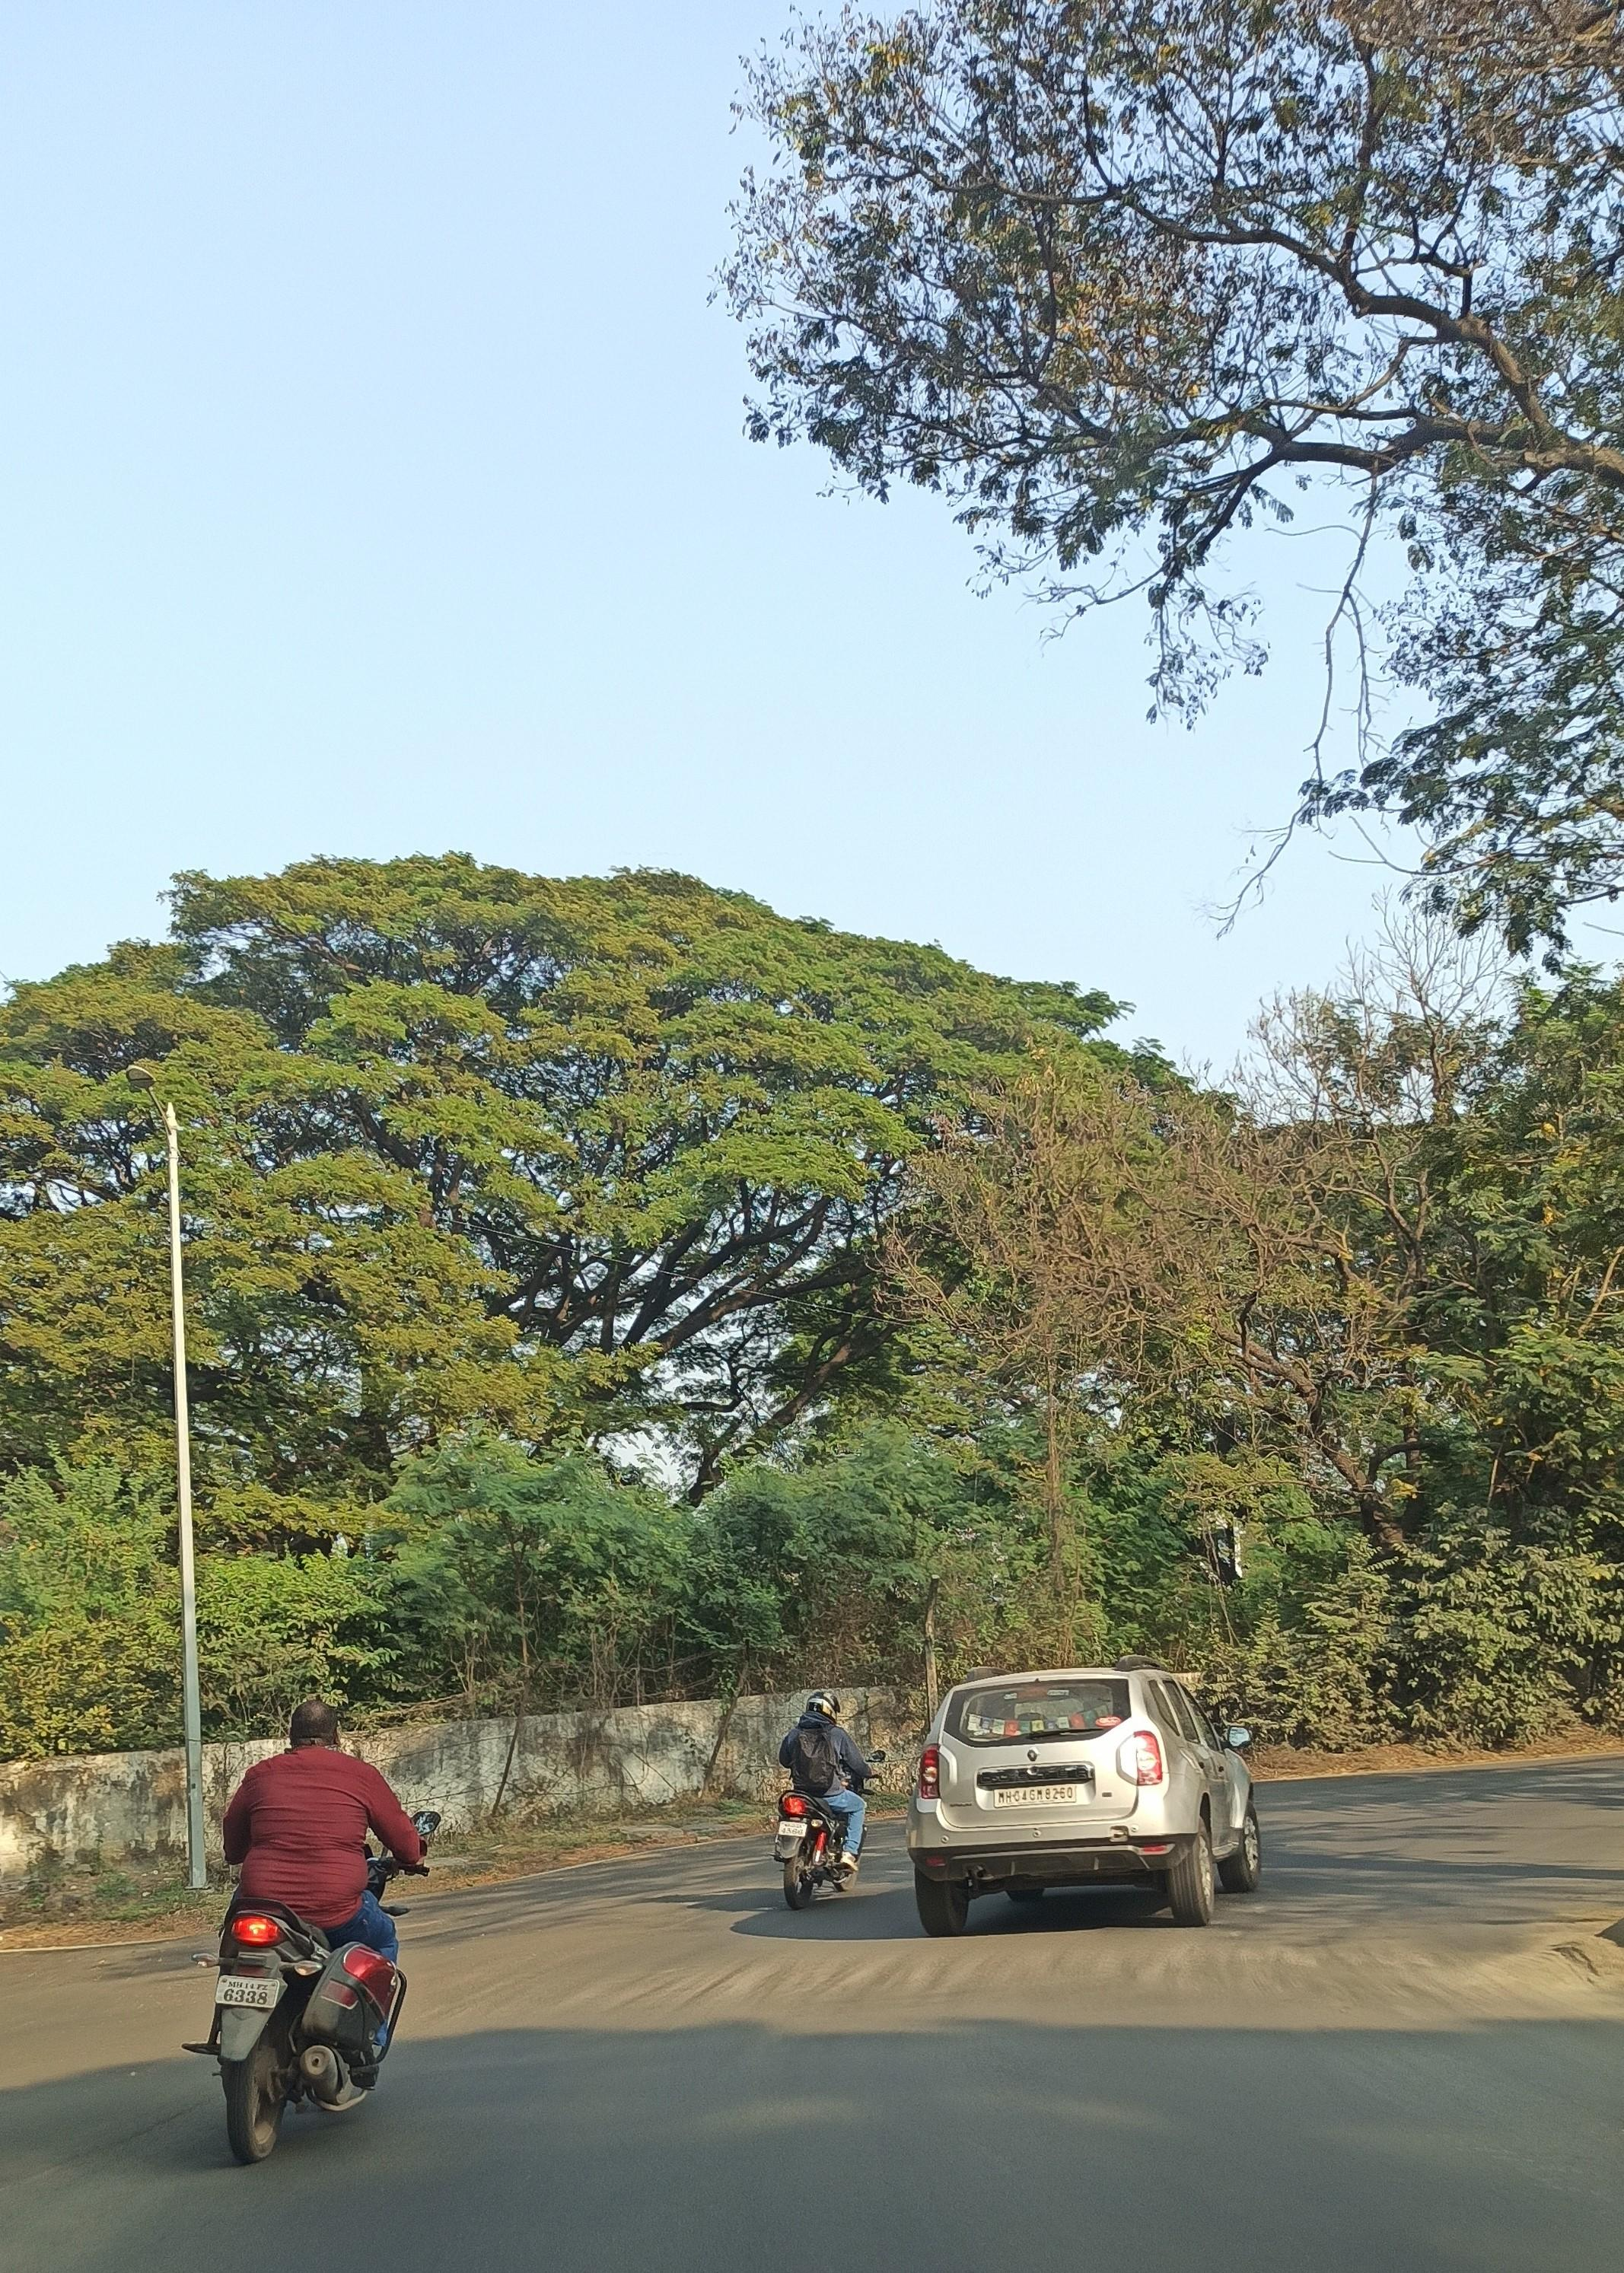

In [26]:
import glob

from IPython.display import display


for image_path in glob.glob('/content/BAP-4/valid/images/*.jpg')[:3]:
    display(Image(filename =image_path , width = 600))
    print("\n")


In [25]:
!yolo task=detect mode = predict  model = /content/runs/detect/train7/weights/best.pt conf = 0.25 source ={dataset.location}/valid/images

Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,854,814 parameters, 0 gradients, 78.8 GFLOPs

image 1/333 /content/BAP-4/valid/images/0_png.rf.0fbe097db6dab7fffffb868c3ce454ea.jpg: 352x640 8 Bikes, 1 Board, 1 Bus, 1 Car, 13 Persons, 4 Rikshaws, 2 Tempos, 2 Traffic-Signals, 2 Zebra-Crossings, 67.8ms
image 2/333 /content/BAP-4/valid/images/103_png.rf.c826e391edae9c7ceb46c8d4f9aa1e32.jpg: 416x640 6 Bikes, 3 Cars, 10 Persons, 5 Rikshaws, 1 Traffic-Sign-Board, 1 Truck, 63.0ms
image 3/333 /content/BAP-4/valid/images/10_png.rf.b4593ad8cbced4e38bcdd40de61ebe29.jpg: 256x640 4 Bikes, 8 Persons, 4 Rikshaws, 2 Traffic-Sign-Boards, 1 Traffic-Signal, 1 Tree, 61.7ms
image 4/333 /content/BAP-4/valid/images/113_png.rf.b8a78220c6671639019898633df4b1ec.jpg: 416x640 3 Bikes, 6 Cars, 1 Person, 3 Rikshaws, 27.9ms
image 5/333 /content/BAP-4/valid/images/115_png.rf.692daf9c47902c8fdc7dcbfbb78ade95.jpg: 288x640 5 Bikes, 3 Cars, 2 Catt

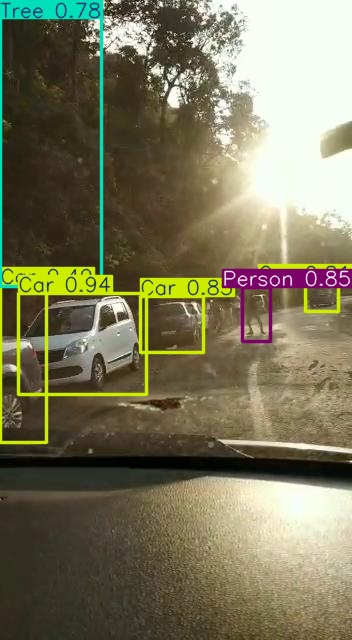

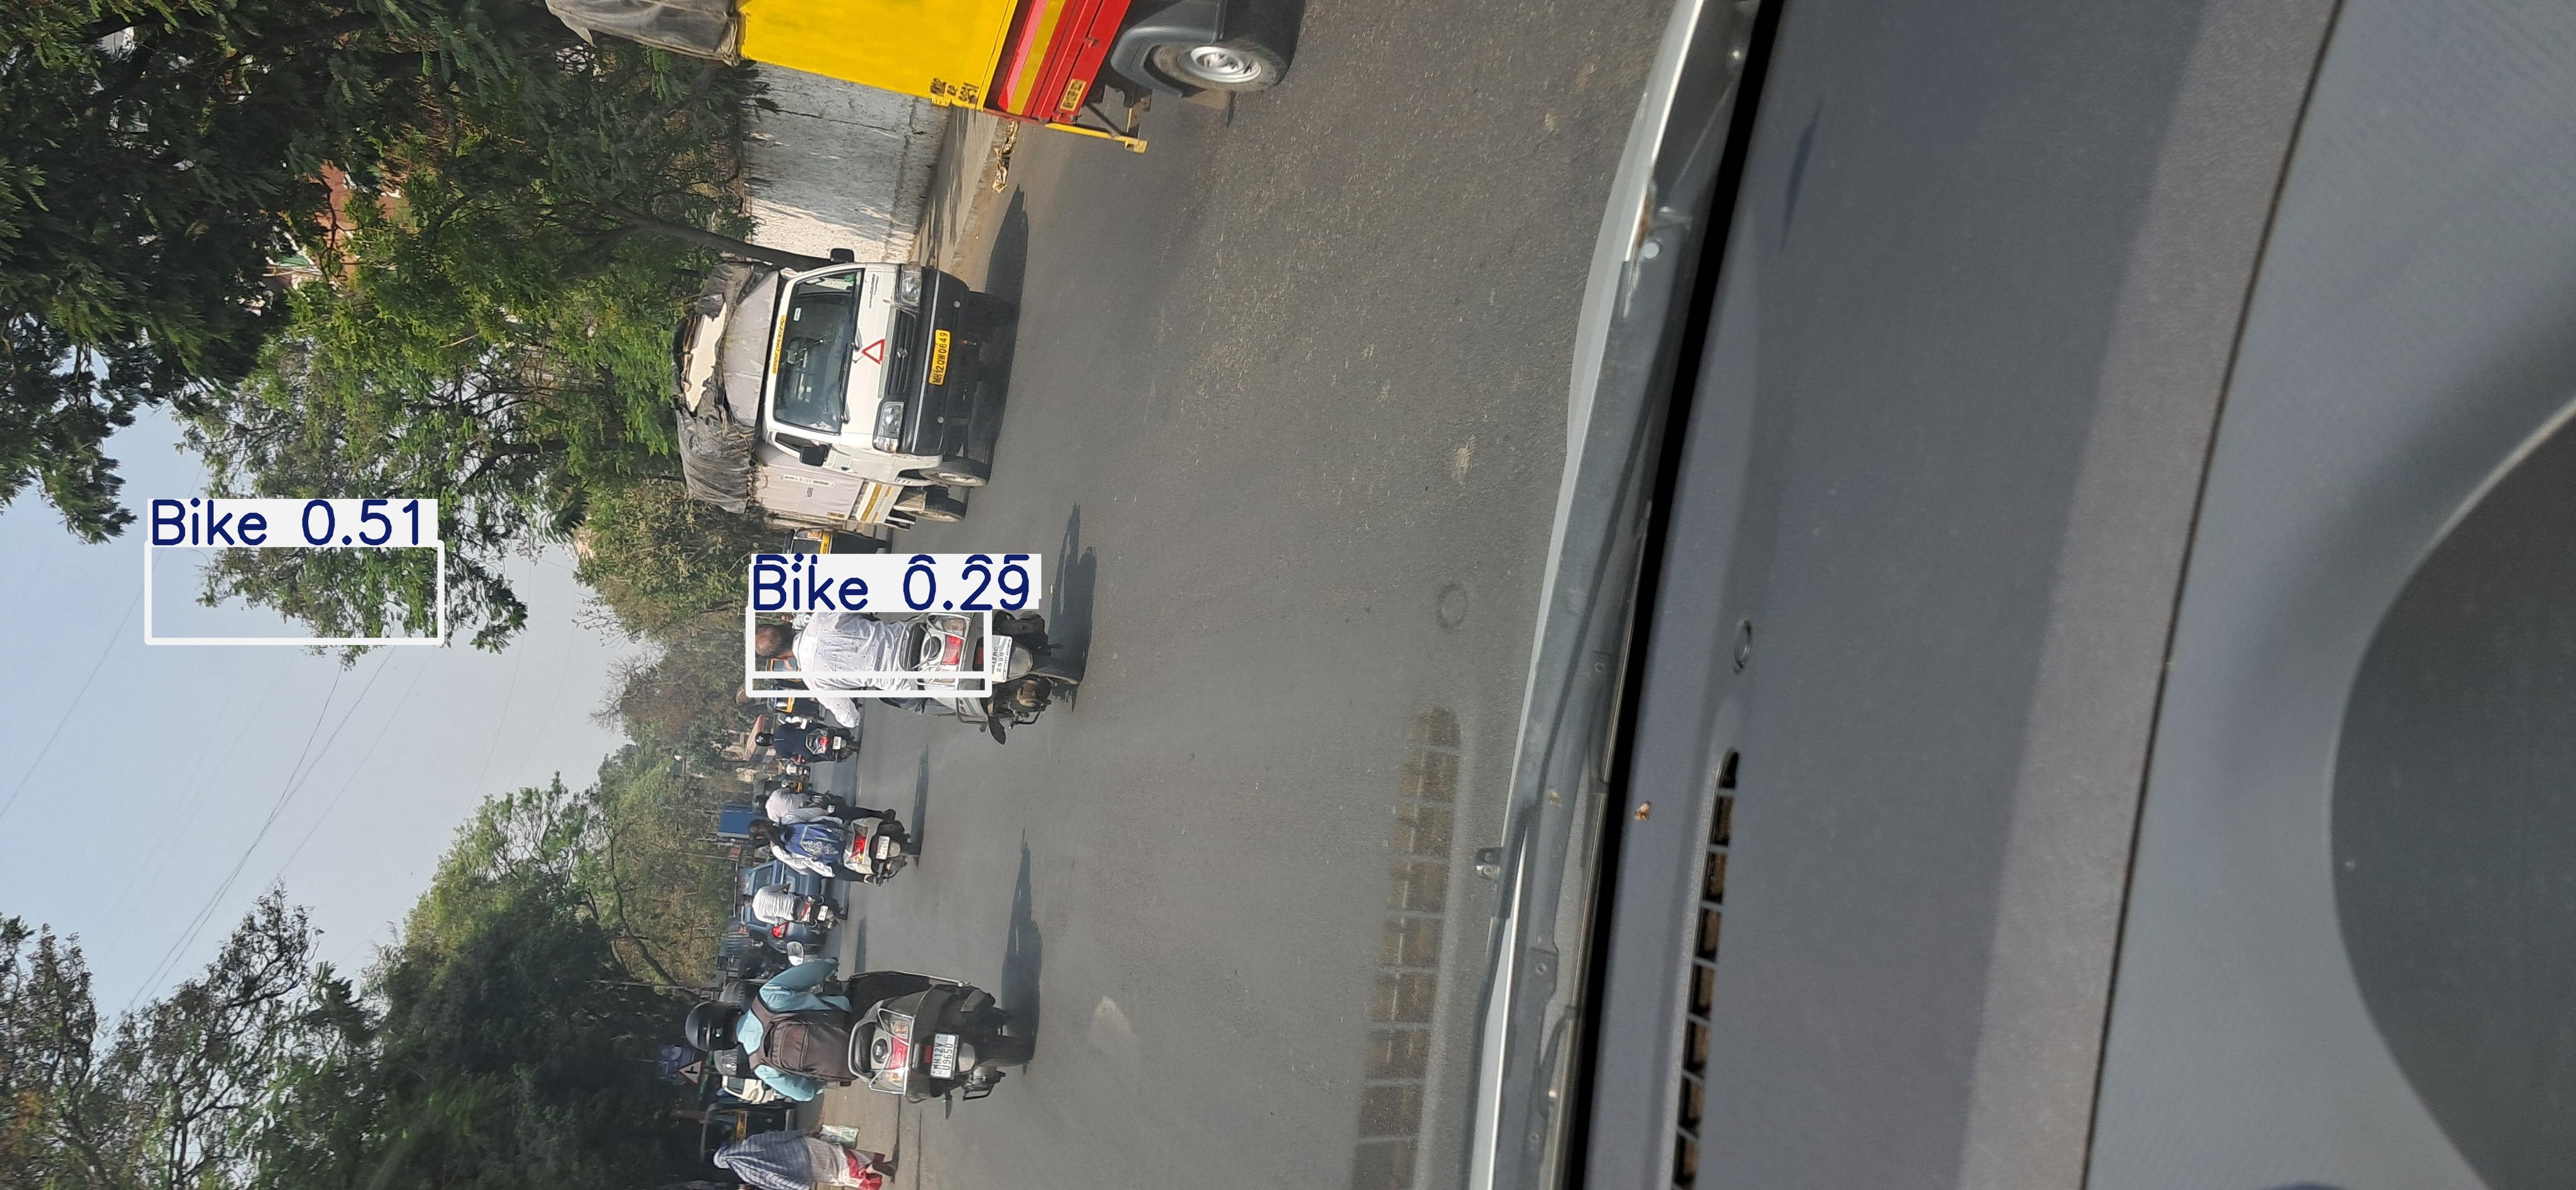

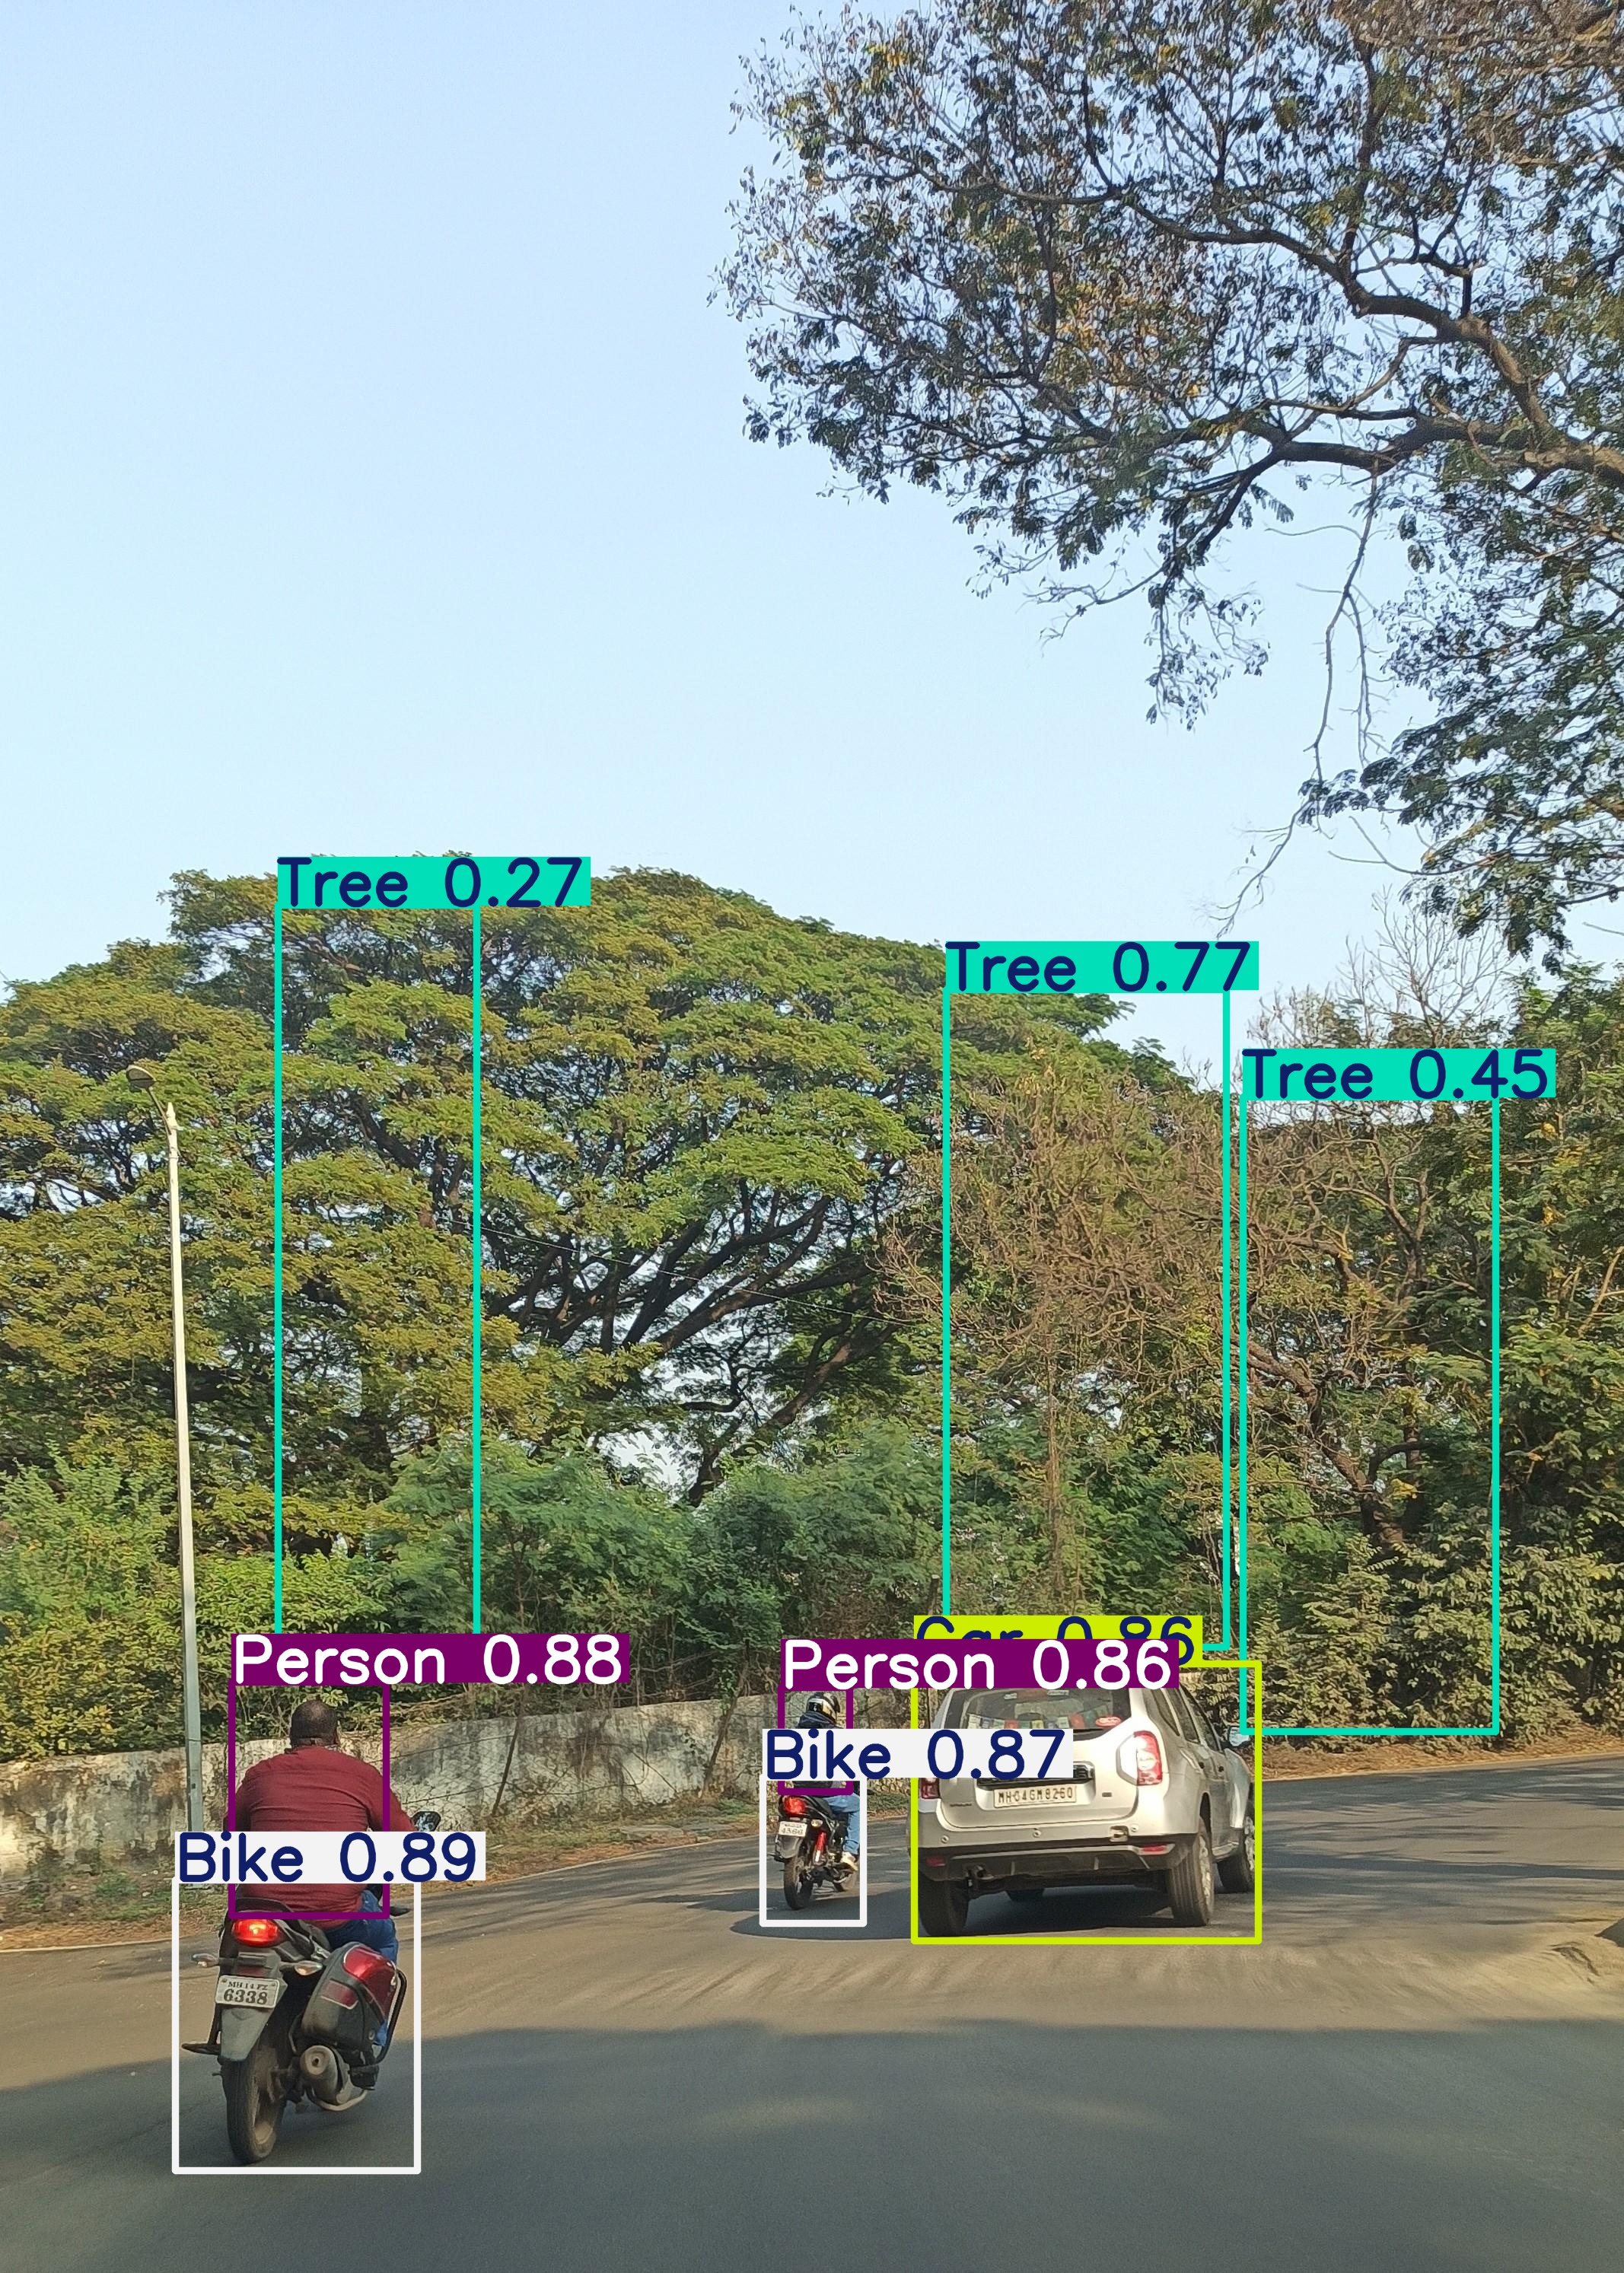

In [27]:
import glob

from IPython.display import display


for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:3]:
    display(Image(filename =image_path , width = 600))
    print("\n")